<font color="black" size="6" style="font-family:sans-serif">Will They Claim it or Not?</font>
<br>
<img src="travel1.jpg" style="width: 1000px;margin-left:10px"/>

# Introduction

## Business Overview

- SafeTravels is world’s largest insurance companies specializing in travel insurance

- Potential Customers - Travelers wanting to insure themselves against travel related risks

- Offerings - 1-way travel insurance, 2-way insurance, insurance against cancellations, renting vehicles insurance, etc.

## Problem Statement
- Building an ML model to predict whether the customer will apply for the claim or not

## Core Business Problem being solved?
- Building an ML model to predict whether the customer will apply for the claim or not
- 1000s of claims spread across different products are received weekly thereby increasing manual effort and time
- Automatically predicting the claims could lead less effort, time and operational costs
- Whenever a claim is registered and if accepted it is a cost to the company

## Stakeholder
- CFO, The company board
- Director Claims Division,
- Head of New Products
- COO
- We are going ahead with <b>CFO</b>

## Data Science Metric
Precision score.



In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

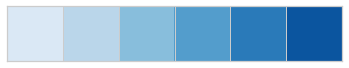

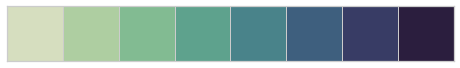

In [3]:
from palettable.colorbrewer.diverging import *

sns.set(style='whitegrid', palette="Spectral_r")
cb_pal = sns.cubehelix_palette(8, start=0.5, rot=-.75)
cpal = sns.color_palette("Blues")
sns.palplot(cpal)
sns.palplot(cb_pal)

In [5]:
# Loading the Data
df_test = pd.read_csv('./file/test.csv')
df_train = pd.read_csv('./file/train.csv')


In [6]:
#Converting Claim to object type
df_train['Claim'] = df_train['Claim'].astype(object)

# EDA

## ClaimRate vs AgencyType

<Figure size 720x576 with 0 Axes>

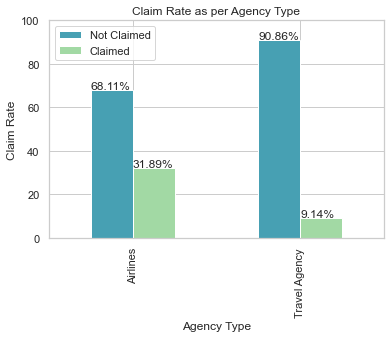

In [7]:
#plotting the graph fpr claim rate vs Agency Type
plt.figure(figsize=(10,8))
cla_agencytype = pd.DataFrame(df_train.groupby(['Agency Type'])['Claim'].value_counts(normalize=True)*100) #converting claim counts grouped by agency type to percentage
cla_agencytype.columns = ['Claim_Rate']  #replacing the claim colum with claim rate
ax = cla_agencytype.unstack().plot(kind = 'bar')

for i in ax.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    ax.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.ylabel("Claim Rate")
plt.title("Claim Rate as per Agency Type")
plt.legend(['Not Claimed', 'Claimed'], loc = 'upper left')
plt.ylim(0,100)
plt.show()

Insights and Recommendations
Insights

Airlines have higher claim rate whereas more than 90% of insurances in train agency are not claimed
Recommendations

Products team can expand the train agency type portfolio

## Top 5 agencies having better claim rate

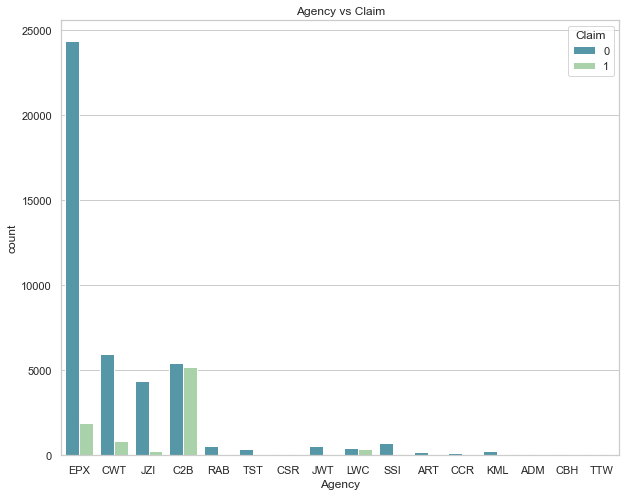

In [8]:
plt.figure(figsize=(10,8))
tl= df_train
sns.countplot('Agency', hue='Claim', data=df_train)
plt.title('Agency vs Claim')

plt.show()

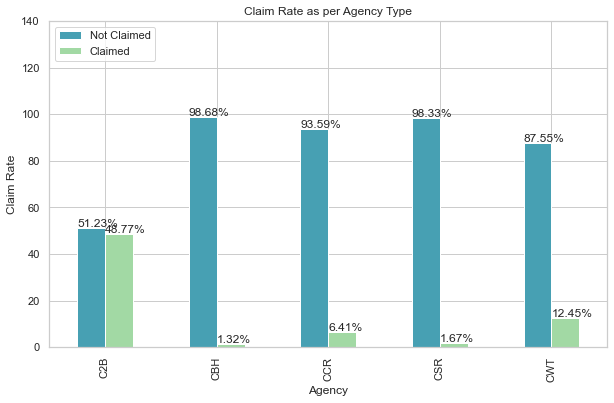

In [9]:
cla_agency = pd.DataFrame(df_train.groupby(['Agency'])['Claim'].value_counts(normalize = True)*100)[2:12] #converting claim counts grouped by agency type to percentage
cla_agency.columns = ['Claim_Rate']
ax = cla_agency.unstack().plot(kind ='bar',figsize =(10,6))

for i in ax.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    ax.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.ylabel("Claim Rate")
plt.title("Claim Rate as per Agency Type")
plt.legend(['Not Claimed', 'Claimed'], loc = 'upper left')
plt.ylim(0,140)
plt.show()

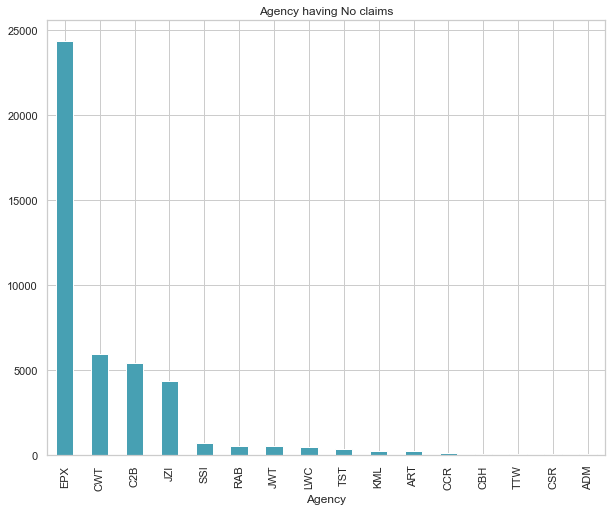

In [10]:
#When no claims
plt.figure(figsize=(10,8))
unclaim=df_train[df_train['Claim']==0]     # condition when claim is zero
unclaim['Agency'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Agency having No claims')
plt.xlabel('Agency')
plt.show()

<Figure size 720x576 with 0 Axes>

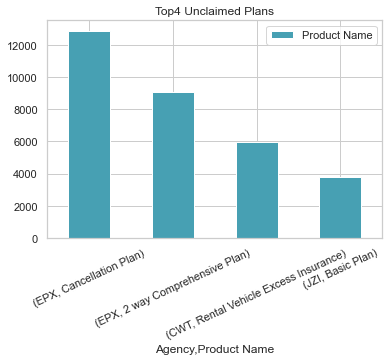

In [11]:
#plotting graph with for unclaimed products of an agency from high to low
plt.figure(figsize=(10,8))
pd.DataFrame(unclaim.groupby(['Agency'])['Product Name'].value_counts().sort_values(ascending=False))[:4].plot(kind='bar')
plt.xticks(rotation=25)
plt.title('Top4 Unclaimed Plans')
plt.show()

<Figure size 720x576 with 0 Axes>

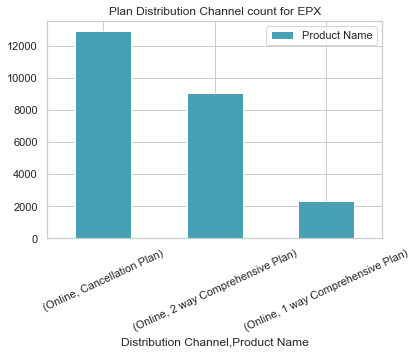

In [12]:
#plotting graph for EPX when no claims received
plt.figure(figsize=(10,8))
unclaim_distribution = unclaim[unclaim['Agency']=='EPX']
pd.DataFrame(unclaim_distribution.groupby(['Distribution Channel'])['Product Name'].value_counts().sort_values(ascending=False))[:3].plot(kind='bar')
plt.xticks(rotation=25)
plt.title('Plan Distribution Channel count for EPX')
plt.show()

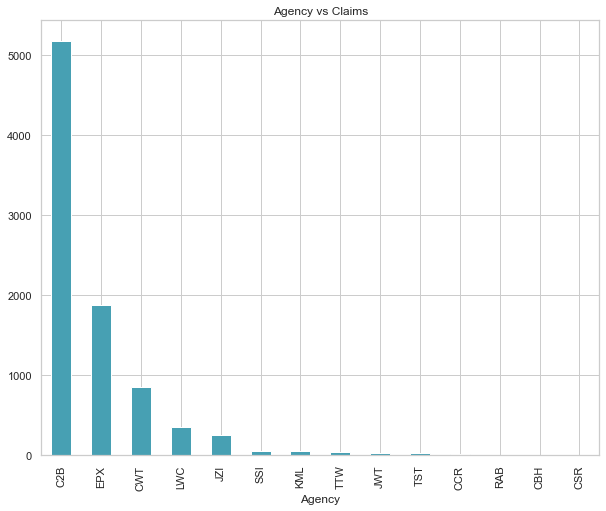

In [13]:
#Agency vs Claim registered
plt.figure(figsize=(10,8))
claimed=df_train[df_train['Claim']==1]
claimed['Agency'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Agency vs Claims')
plt.xlabel('Agency')
plt.show()

<Figure size 720x576 with 0 Axes>

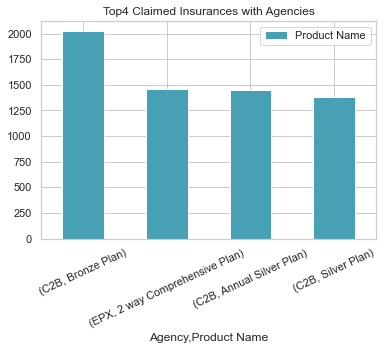

In [14]:
#plotting top4 Claimed Insurances with Agencies
plt.figure(figsize=(10,8))
pd.DataFrame(claimed.groupby(['Agency'])['Product Name'].value_counts().sort_values(ascending=False))[:4].plot(kind='bar')
plt.xticks(rotation=25)
plt.title('Top4 Claimed Insurances with Agencies')
plt.show()

Insights and Recommendations
Insights Unclaimed
Mostly unclaimed insurances are from Travel Agencies like EPX and C2B forinsurances such as cancellation plan,2-way Comprehensive Plan and Rental Vehicle Excess.
Online insurances like cancellation plan,2-way Comprehensive Plan are mostly unclaimed in EPX
Recommendations Unclaimed
Such plans should be targeted extensively on OTA as well as on our website extensively.
Insights Claimed

C2B has maximum claims registered for Bronze and nnual Silver Plan followed by EPX in 2 way Comprehensive and Silver Plan -
Recommendations Claimed

We should increase the premium of these Plans
Automate the process with less overhead and overlay

## Portfolio Analysis


In [15]:
plt.figure(figsize=(10,8))
#Product Name with claims count and percentage
pc_counts = pd.DataFrame(df_train.groupby(["Product Name"])["Claim"].value_counts())
pc_percent = pd.DataFrame(df_train.groupby(["Product Name"])["Claim"].value_counts(normalize=True)*100)
pc_counts.columns = ['Claim_counts']
pc_percent.columns = ['Claim_percent']
pc_percent

Claim_percent
Product Name                         Claim               
1 way Comprehensive Plan             0          97.177252
                                     1           2.822748
2 way Comprehensive Plan             0          86.196116
                                     1          13.803884
24 Protect                           0         100.000000
Annual Gold Plan                     1          58.305085
                                     0          41.694915
Annual Silver Plan                   1          61.797274
                                     0          38.202726
Annual Travel Protect Gold           1          65.573770
                                     0          34.426230
Annual Travel Protect Platinum       0          72.000000
                                     1          28.000000
Annual Travel Protect Silver         0          66.304348
                                     1          33.695652
Basic Plan                           0          93.913904
                                     1           6.086096
Bronze Plan                          0          57.230574
                                     1          42.769426
Cancellation Plan                    0          97.321563
                                     1           2.678437
Child Comprehensive Plan             0         100.000000
Comprehensive Plan                   0          95.683453
                                     1           4.316547
Gold Plan                            0          62.368421
                                     1          37.631579
Individual Comprehensive Plan        0          55.952381
                                     1          44.047619
Premier Plan                         0          98.581560
                                     1           1.418440
Rental Vehicle Excess Insurance      0          87.553207
                                     1          12.446793
Silver Plan                          0          51.642208
                                     1          48.357792
Single Trip Travel Protect Gold      0          51.792829
                                     1          48.207171
Single Trip Travel Protect Platinum  0          50.000000
                                     1          50.000000
Single Trip Travel Protect Silver    0          87.692308
                                     1          12.307692
Spouse or Parents Comprehensive Plan 0          91.666667
                                     1           8.333333
Ticket Protector                     0          92.692308
                                     1           7.307692
Travel Cruise Protect                0          94.670051
                                     1           5.329949
Value Plan                           0          95.206527
                                     1           4.793473

<Figure size 720x576 with 0 Axes>

In [17]:
pc_percent_ri = pc_percent.copy()
pc_percent_ri.reset_index(inplace=True) # resetting index
pc_counts_ri = pc_counts.copy()
pc_counts_ri.reset_index(inplace=True)

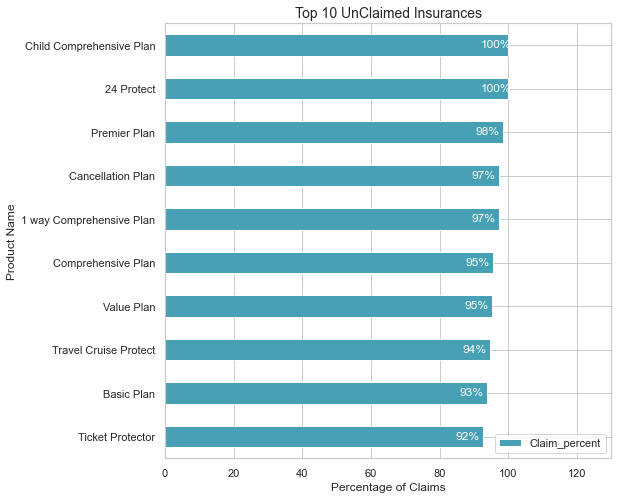

In [19]:
#plotting for Top 10 UnClaimed Insurances

top10_products_c0=pc_percent_ri[pc_percent_ri['Claim']==0].sort_values(by='Claim_percent',ascending =False)[:10]
top10_products_c0 = top10_products_c0.sort_values('Claim_percent')


ax = top10_products_c0.drop('Claim',axis=1).set_index('Product Name').plot(kind='barh',figsize=(8,8))
plt.title('Top 10 UnClaimed Insurances',fontdict={'fontsize':14})
plt.xlabel('Percentage of Claims')
plt.legend(loc = 'lower right')
plt.xlim((0,130))
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(int(w))+'%', (x+w-8,y+.2),color='white')
    
plt.show()

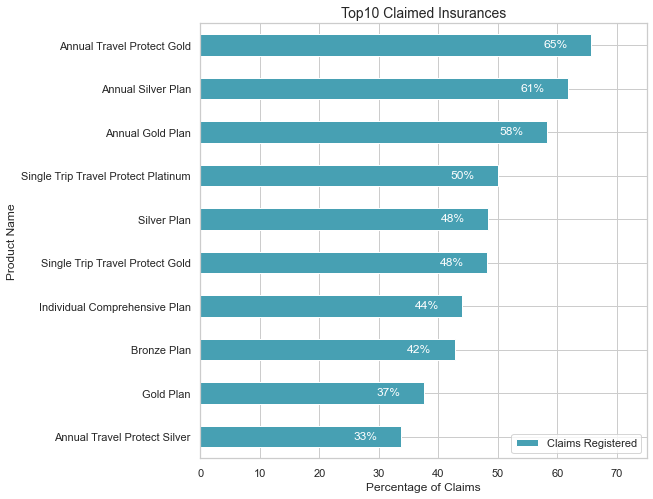

In [20]:
#Plotting for Top10 Claimed Insurances
top10_products_c1 = pc_percent_ri[pc_percent_ri['Claim']==1].sort_values(by='Claim_percent',ascending=False)[:10]
top10_products_c1 = top10_products_c1.sort_values('Claim_percent')

ax = top10_products_c1.drop('Claim',axis=1).set_index('Product Name').plot(kind='barh',figsize=(8,8))
plt.title('Top10 Claimed Insurances',fontdict={'fontsize':14})
plt.xlabel('Percentage of Claims')
plt.legend(['Claims Registered'])
plt.xlim((0,75))

for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(int(w))+'%', (x+w-8,y+.2),color='white')
plt.show()

Insights and recommendations
-Insights

- Top 10 unclaimed insurances are more than 97% times unclaimed.
- Annual Gold, Silver and Travel protect Gold plan are claimed more than 50%
-Recommendations

- Premiums of Annual Plans can be increased.

## Net Sales vs Products


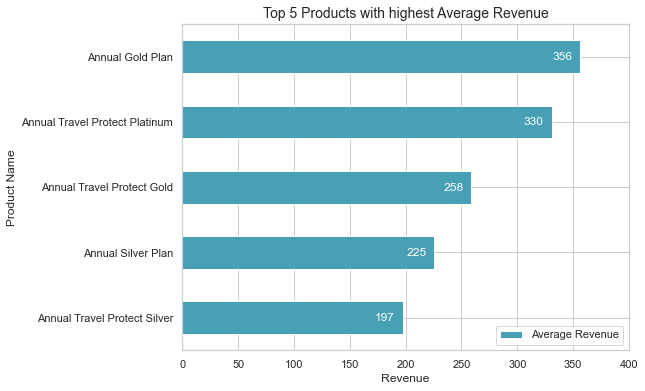

In [22]:
#top 5 products by mean of net sales ---- FINAL

net_sales_top5_mean = df_train.groupby(["Product Name"])[["Net Sales"]].mean().sort_values("Net Sales", ascending = False).iloc[:5]

#plotting top 5 products by mean of net sales

ax = net_sales_top5_mean.sort_values('Net Sales',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Average Revenue',fontdict={'fontsize':14})
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.legend(['Average Revenue'])
plt.xlim((0,400))
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(int(w)), (x+w-25,y+.2),color='white',)


plt.show()



## Average Net Sales for Annul Gold Plan is highest

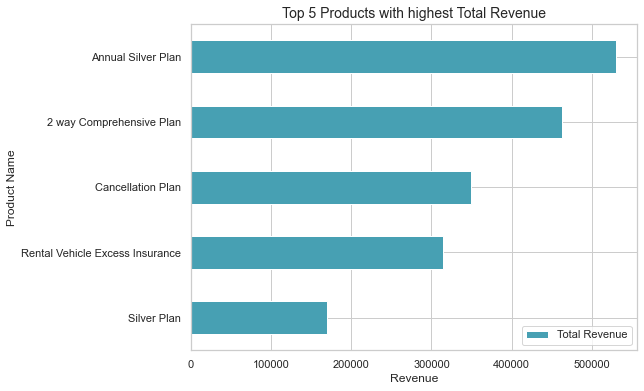

In [23]:
#top 5 products by sum of net sales

net_sales_top5_sum = df_train.groupby(["Product Name"])[["Net Sales"]].sum().sort_values("Net Sales", ascending = False).iloc[:5]
net_sales_top5_sum

#plotting top 5 products by sum of net sales
net_sales_top5_sum.sort_values('Net Sales',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Total Revenue',fontdict={'fontsize':14})
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.legend(['Total Revenue'])

plt.show()

## Product vs net sales vs commision

In [24]:
# Average commision for top 5 products
comm_top5_mean = df_train.groupby(["Product Name",])[["Commision (in value)"]].mean().sort_values("Commision (in value)",ascending=False)[:5]
comm_top5_mean

,Commision (in value)
Product Name,
Annual Travel Protect Platinum,215.064490
Annual Travel Protect Gold,168.162634
Annual Travel Protect Silver,133.677591
Annual Gold Plan,91.491629
Annual Silver Plan,57.291729


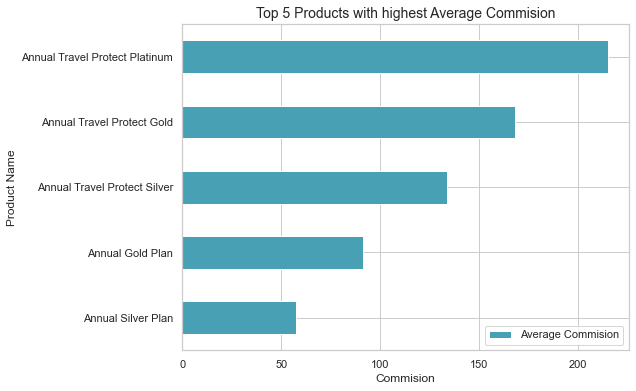

In [25]:
# Plotting for Average commision for top 5 products --FINAL

comm_top5_mean.sort_values('Commision (in value)',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Average Commision',fontdict={'fontsize':14})
plt.xlabel('Commision')
plt.ylabel('Product Name')
plt.legend(['Average Commision'])
plt.show()

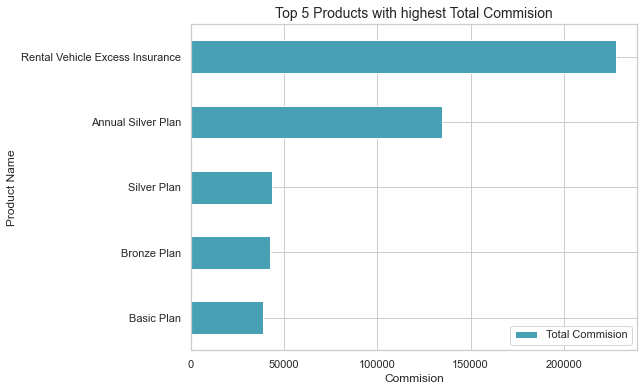

In [26]:
# Plotting for Total commision for top 5 products
comm_top5_sum = df_train.groupby(["Product Name",])[["Commision (in value)"]].sum().sort_values("Commision (in value)",ascending=False)[:5]

comm_top5_sum.sort_values('Commision (in value)',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Total Commision',fontdict={'fontsize':14})
plt.xlabel('Commision')
plt.ylabel('Product Name')
plt.legend(['Total Commision'])
plt.show()

- Insights

- Annual Travel Protect Platinum commision has highest average commission, Rental Vehicle Excess Insurance has overall highest commission

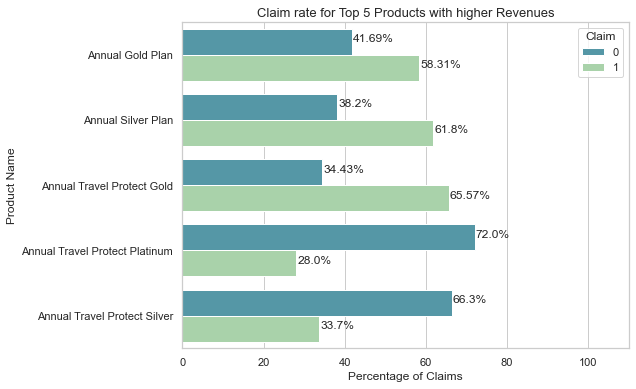

In [27]:
# Plotting for Claim rate for Top 5 Products with higher Revenues -- FINAL
product_cpercent = pd.DataFrame(df_train.groupby(['Product Name'])['Claim'].value_counts(normalize=True)*100)
product_cpercent.columns = ['Claim_percent']
product_cpercent.reset_index(inplace=True)

list_net_sales_top5_mean = ['Annual Gold Plan','Annual Travel Protect Platinum','Annual Travel Protect Gold','Annual Silver Plan','Annual Travel Protect Silver']


# net sales mean only
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(y='Product Name', x='Claim_percent',
        data=product_cpercent[   (product_cpercent['Product Name'] == list_net_sales_top5_mean[0])|
                                 (product_cpercent['Product Name'] == list_net_sales_top5_mean[1])|
                                 (product_cpercent['Product Name'] == list_net_sales_top5_mean[2])|
                                 (product_cpercent['Product Name'] == list_net_sales_top5_mean[3])|
                                 (product_cpercent['Product Name'] == list_net_sales_top5_mean[4])]
        ,hue='Claim')
plt.title('Claim rate for Top 5 Products with higher Revenues',fontdict={'fontsize':13})
plt.xlabel('Percentage of Claims')

plt.xlim((0,110))

for p in ax.patches:
    _x = p.get_x() + p.get_width() + 0.3
    _y = p.get_y() + p.get_height() - 0.2
    value = str(np.round(p.get_width(),2))+'%'
    ax.text(_x, _y, value, va="baseline", ha='left')

plt.show()

In [28]:
df_train.groupby(["Product Name"])[['Net Sales',"Commision (in value)"]].agg(["count","sum","mean"])

Net Sales                             \
                                         count            sum        mean   
Product Name                                                                
1 way Comprehensive Plan                  2409   66253.347009   27.502427   
2 way Comprehensive Plan                 10555  463068.162004   43.871924   
24 Protect                                 165    3389.160000   20.540364   
Annual Gold Plan                           295  105211.774342  356.650083   
Annual Silver Plan                        2348  529705.614727  225.598643   
Annual Travel Protect Gold                 183   47344.266627  258.711839   
Annual Travel Protect Platinum              50   16543.457956  330.869159   
Annual Travel Protect Silver                92   18155.612821  197.343618   
Basic Plan                                4042  107291.844272   26.544246   
Bronze Plan                               4723  166163.651473   35.181802   
Cancellation Plan                        13254  348623.765841   26.303287   
Child Comprehensive Plan                     8     592.000000   74.000000   
Comprehensive Plan                         278    7975.964633   28.690520   
Gold Plan                                  380   28692.242098   75.505900   
Individual Comprehensive Plan               84    8300.837787   98.819497   
Premier Plan                               141    8931.000000   63.340426   
Rental Vehicle Excess Insurance           6813  314100.060080   46.103047   
Silver Plan                               2862  170003.076877   59.400097   
Single Trip Travel Protect Gold            251    9524.137237   37.944770   
Single Trip Travel Protect Platinum        100    4659.139792   46.591398   
Single Trip Travel Protect Silver          130    4467.957908   34.368907   
Spouse or Parents Comprehensive Plan        12    1032.000000   86.000000   
Ticket Protector                           780    5134.452045    6.582631   
Travel Cruise Protect                      394   11532.729697   29.270888   
Value Plan                                1961   93198.693267   47.526106   

                                     Commision (in value)                 \
                                                    count            sum   
Product Name                                                               
1 way Comprehensive Plan                             2409      43.493052   
2 way Comprehensive Plan                            10555     278.217247   
24 Protect                                            165    1258.490000   
Annual Gold Plan                                      295   26990.030566   
Annual Silver Plan                                   2348  134520.980472   
Annual Travel Protect Gold                            183   30773.761967   
Annual Travel Protect Platinum                         50   10753.224492   
Annual Travel Protect Silver                           92   12298.338334   
Basic Plan                                           4042   38768.280844   
Bronze Plan                                          4723   42748.012172   
Cancellation Plan                                   13254      98.026259   
Child Comprehensive Plan                                8       0.000000   
Comprehensive Plan                                    278    2769.423650   
Gold Plan                                             380    7680.681303   
Individual Comprehensive Plan                          84     187.382477   
Premier Plan                                          141    4131.510000   
Rental Vehicle Excess Insurance                      6813  227852.793835   
Silver Plan                                          2862   43360.453712   
Single Trip Travel Protect Gold                       251    6467.598268   
Single Trip Travel Protect Platinum                   100    3091.059272   
Single Trip Travel Protect Silver                     130    3025.380965   
Spouse or Parents Comprehensive Plan                   1

## Net Sales vs Commission

<AxesSubplot:>

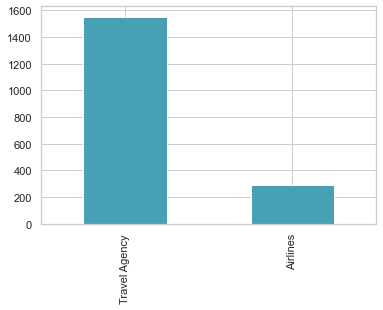

In [29]:
df_train[df_train['Net Sales']<=0]['Agency Type'].value_counts().plot(kind='bar')

## Agency Type vs Claim rate

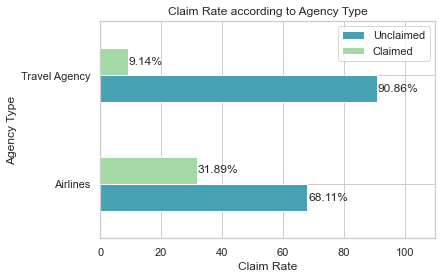

In [30]:
#train agency - Final

atcr = pd.DataFrame(df_train.groupby(['Agency Type'])['Claim'].value_counts(normalize=True)*100)
atcr.columns = ['Claim Rate']
ax = atcr.unstack().plot(kind='barh')
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(w,2))+"%", (x+w+.2,y+.1))
# plt.xlabel("Age group")
plt.xlabel("Claim Rate")
plt.title("Claim Rate according to Agency Type")
plt.legend(['Unclaimed','Claimed'],loc='upper right')
plt.xlim((0,110))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


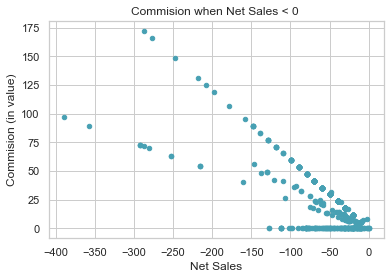

In [31]:
df_train[df_train['Net Sales']<0].plot.scatter(x='Net Sales', y='Commision (in value)')
plt.title('Commision when Net Sales < 0 ')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


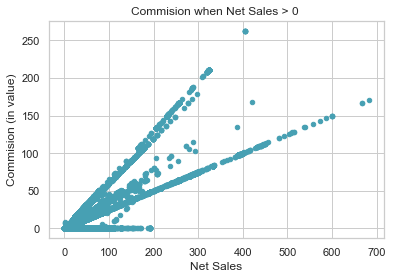

In [32]:
df_train[df_train['Net Sales']>0].plot.scatter(x='Net Sales', y='Commision (in value)')
plt.title('Commision when Net Sales > 0 ')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


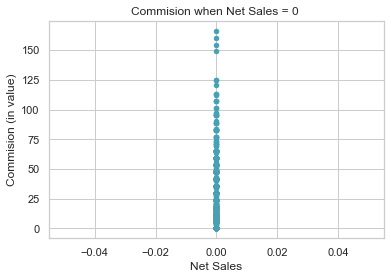

In [33]:
df_train[df_train['Net Sales']==0].plot.scatter(x='Net Sales', y='Commision (in value)')
plt.title('Commision when Net Sales = 0 ')
plt.show()

array([[<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Net Sales'}>],
       [<AxesSubplot:title={'center':'Commision (in value)'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

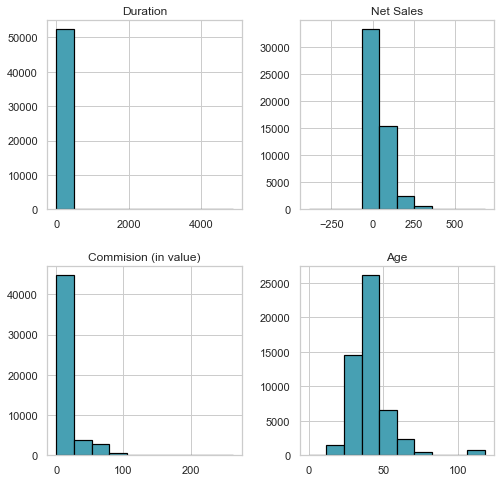

In [34]:
df_train[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].\
hist(edgecolor='black', linewidth=1.2, figsize=(8, 8))

## Destination Analysis

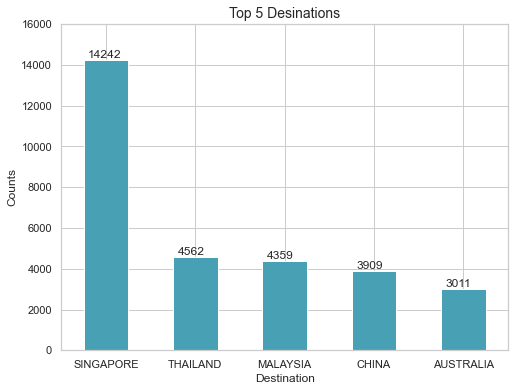

In [37]:
top_5_dest = df_train['Destination'].value_counts()[:5]

top_5_dest.plot.bar(figsize=(8,6))
for n, c in enumerate(top_5_dest):
    plt.text(x=n-0.2,y=c+100, s = c)
plt.xlabel("Destination")
plt.ylim((0,16000))
plt.ylabel("Counts")
plt.title('Top 5 Desinations',fontdict={'fontsize':14})
plt.xticks(rotation='horizontal')
plt.show()

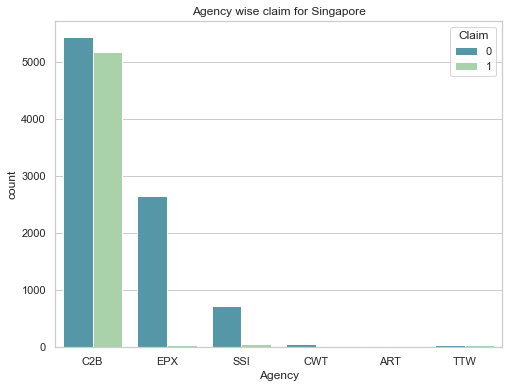

In [38]:
top_country = df_train[df_train['Destination']=='SINGAPORE']
plt.figure(figsize=(8,6))
sns.countplot('Agency', data=top_country, hue='Claim')
plt.title('Agency wise claim for Singapore')
plt.show()

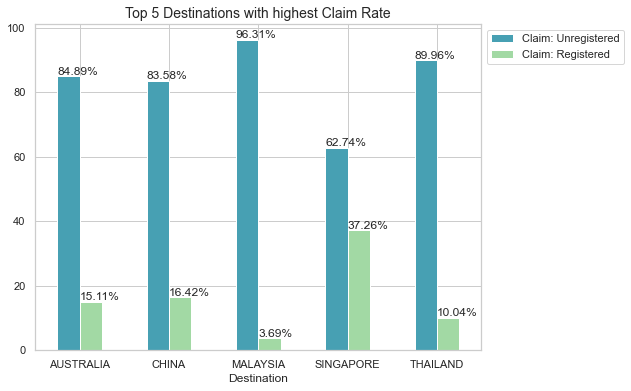

In [39]:
#Final
top_dest = df_train[(df_train['Destination'] == 'SINGAPORE')|
                 (df_train['Destination'] == 'THAILAND')|
                 (df_train['Destination'] == 'MALAYSIA')|
                 (df_train['Destination'] == 'CHINA') |
                 (df_train['Destination'] == 'AUSTRALIA')]
top_dest_claim = top_dest.groupby(["Destination","Claim"])[["Claim"]].count()/top_dest.groupby(["Destination"])[["Claim"]].count()*100
ax = top_dest_claim.unstack().plot.bar(figsize=(8,6))
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(h,2))+"%", (x,y+h+.5))
plt.title('Top 5 Destinations with highest Claim Rate',fontdict={'fontsize':14})
plt.legend(['Claim: Unregistered','Claim: Registered'],bbox_to_anchor=(1,1))
plt.xticks(rotation='horizontal')

plt.show()

## Age Analysis


In [41]:
df_train["age_bracket"] = pd.cut(df_train['Age'], [0,20,40,60,80,100,120])
df_train['age_bracket'].value_counts()
d_i = df_train['age_bracket'].value_counts().index

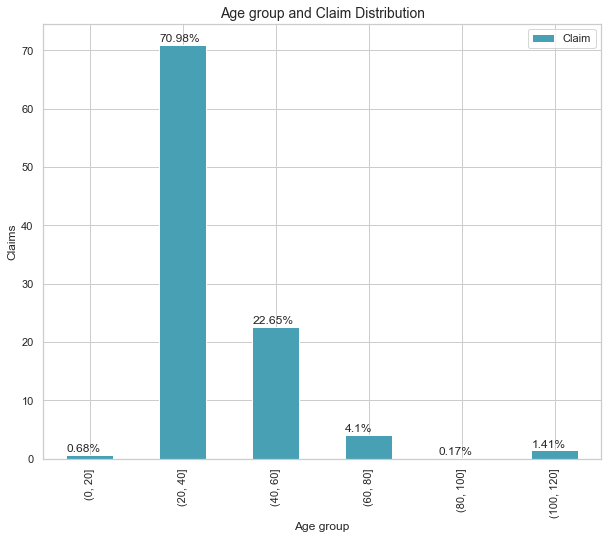

In [42]:
#Final
age_dict = {d_i[0]:"20-40",d_i[1]:"40-60",d_i[2]:"60-80",d_i[3]:"100-120",d_i[4]:"0-20",d_i[5]:"80-1000"}

age_claims = (df_train.groupby(["age_bracket"])[["Claim"]].count()/len(df_train)*100)
ax = (df_train.groupby(["age_bracket"])[["Claim"]].count()/len(df_train)*100).plot(kind="bar",figsize=(10,8))
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(h,2))+"%", (x,y+h+0.5))
plt.xlabel("Age group")
plt.ylabel("Claims")
plt.title("Age group and Claim Distribution",fontdict={'fontsize':14})
plt.show()

# Duration - Hypothesis Testing

(0.0, 0.002)

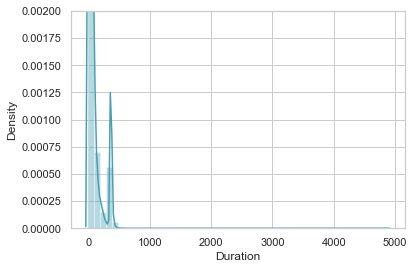

In [43]:
sns.distplot(df_train.Duration)
plt.ylim((0,0.002))

In [44]:
df_train['Duration'].describe()

count    52310.000000
mean        58.256108
std        109.138708
min         -2.000000
25%         10.000000
50%         24.000000
75%         57.000000
max       4881.000000
Name: Duration, dtype: float64

##### Unit isn't standardized.
If the units are in days, maximum number is 4881, so that is nearly 13.37 years.

In [46]:
#count greather than one year.
greater = df_train[df_train.Duration > 365]
greater.shape

(1966, 12)

In [47]:
#Customers taking more tahn 1 year plans
print(f"People who spent more than an year = {np.round(greater.shape[0]/df_train.shape[0]*100,2)}%")

People who spent more than an year = 3.76%


In [48]:
#converting the duration to years
greater["Duration Year"] = greater.Duration.map(lambda x: int(x/365))
greater

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,age_bracket,Duration Year
31,6106,C2B,Airlines,Online,Annual Silver Plan,374,SINGAPORE,216.00,54.00,33,0,"(20, 40]",1
53,2406,C2B,Airlines,Online,Annual Gold Plan,391,SINGAPORE,449.25,112.31,32,0,"(20, 40]",1
74,3619,C2B,Airlines,Online,Annual Silver Plan,396,SINGAPORE,291.75,72.94,34,1,"(20, 40]",1
89,6679,C2B,Airlines,Online,Annual Silver Plan,369,SINGAPORE,216.00,54.00,35,0,"(20, 40]",1
108,3284,C2B,Airlines,Online,Annual Silver Plan,376,SINGAPORE,216.00,54.00,35,1,"(20, 40]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52177,7423,C2B,Airlines,Online,Annual Silver Plan,374,SINGAPORE,194.50,48.63,35,0,"(20, 40]",1
52184,9191,LWC,Travel Agency,Online,Annual Travel Protect Platinum,370,UNITED STATES,323.40,210.21,51,0,"(40, 60]",1
52187,5856,C2B,Airlines,Online,Annual Silver Plan,367,SINGAPORE,161.00,40.25,36,0,"(20, 40]",1
52253,8193,C2B,Airlines,Online,Annual Gold Plan,417,SINGAPORE,321.75,80.44,43,0,"(40, 60]",1


In [49]:
greater.groupby(["Duration Year","Product Name"])[["Product Name"]].count().rename(columns={'Product Name':'Counts'})

Counts
Duration Year Product Name                                
1             Annual Gold Plan                         176
              Annual Silver Plan                      1483
              Annual Travel Protect Gold               139
              Annual Travel Protect Platinum            41
              Annual Travel Protect Silver              81
              Bronze Plan                                3
              Child Comprehensive Plan                   3
              Individual Comprehensive Plan             22
              Rental Vehicle Excess Insurance            1
              Spouse or Parents Comprehensive Plan       7
2             Annual Silver Plan                         1
12            Ticket Protector                           3
13            Ticket Protector                           6

In [50]:
#count lesser than one year.
lesser = df_train[df_train.Duration < 365]
lesser.shape

(49702, 12)

In [51]:
# filtering Annual products
annual = lesser[lesser['Product Name'].str.startswith("Annual")]
annual['Product Name']

122      Annual Silver Plan
180      Annual Silver Plan
485      Annual Silver Plan
784      Annual Silver Plan
1062     Annual Silver Plan
                ...        
52143    Annual Silver Plan
52144    Annual Silver Plan
52152    Annual Silver Plan
52181    Annual Silver Plan
52212    Annual Silver Plan
Name: Product Name, Length: 427, dtype: object

In [52]:
annual.groupby(["Product Name","Duration"])[["Duration"]].count().rename(columns={"Duration":"counts"})

,,counts
Product Name,Duration,
Annual Gold Plan,364,41
Annual Silver Plan,364,361
Annual Travel Protect Gold,364,15
Annual Travel Protect Platinum,364,6
Annual Travel Protect Silver,364,4


# Data Inspection 

## Null/Missing Value Analysis


In [53]:
# Null Value
df_train.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
age_bracket             2
dtype: int64

- Conclusion: <br>
No null value present in Data. Handling is not needed.



## Categorical vs Numerical 


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    52310 non-null  int64   
 1   Agency                52310 non-null  object  
 2   Agency Type           52310 non-null  object  
 3   Distribution Channel  52310 non-null  object  
 4   Product Name          52310 non-null  object  
 5   Duration              52310 non-null  int64   
 6   Destination           52310 non-null  object  
 7   Net Sales             52310 non-null  float64 
 8   Commision (in value)  52310 non-null  float64 
 9   Age                   52310 non-null  int64   
 10  Claim                 52310 non-null  object  
 11  age_bracket           52308 non-null  category
dtypes: category(1), float64(2), int64(3), object(6)
memory usage: 4.4+ MB


In [55]:
#Displays Categorical and Numerical Features from dataframe
def cat_numeric_details(df):
    print('Total Numerical Coulmns : ', len(list(df.select_dtypes(exclude=['object']).columns)), "\n")
    print('Numerical Coulmns : ', list(df.select_dtypes(exclude=['object']).columns), "\n")
    print('Total Categorical Coulmns : ', len((df.select_dtypes(include=['object']).columns)),"\n")
    print('Categorical Coulmns : ', list(df.select_dtypes(include=['object']).columns))
    
cat_numeric_details(df_train)

Total Numerical Coulmns :  6 

Numerical Coulmns :  ['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age', 'age_bracket'] 

Total Categorical Coulmns :  6 

Categorical Coulmns :  ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Claim']


- Conclusion: <br>
Categorical Columns : 6 <br>
Numerical Coulmns : 5



# Data Distribution

In [56]:
df_train.describe()

,ID,Duration,Net Sales,Commision (in value),Age
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725
std,2306.450475,109.138708,60.198589,22.847645,13.762473
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000


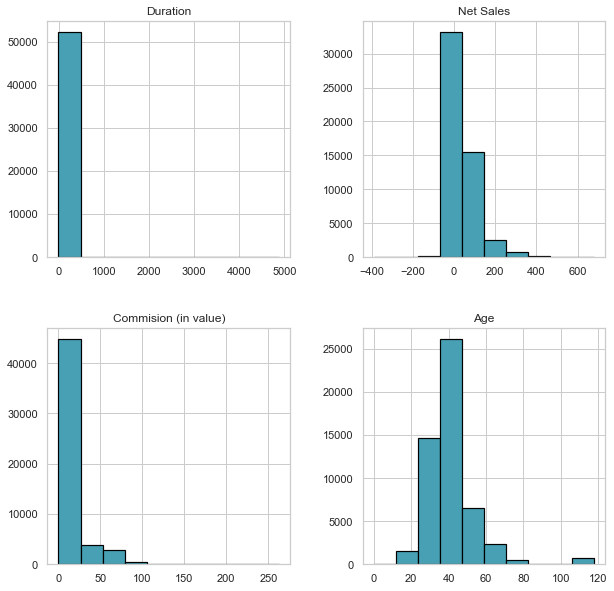

In [57]:
# Visulazing the distibution of the data for every feature
df_train[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].hist(edgecolor='black',\
                                                                        linewidth=1.2, figsize=(10, 10));

- Conclusion: <br>
Age, Commission, Net Sales are right skewed

# Target Column Analysis

<AxesSubplot:xlabel='Claim'>

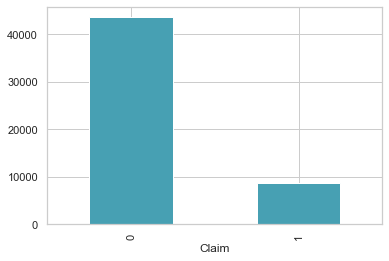

In [59]:
#DATA IS BIASED OR NOT
df_train.groupby('Claim')['Claim'].agg('count').plot.bar()

- INSIGHT : Data is biased. <br>
- CONCLUSION : ACCURACY IS NOT GOOD METRIC